## 知識情報学第13回演習サンプルプログラム ex13.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Last updated: 2021/01/19
- Checked with Python 3.8.16, scikit-learn 1.3.1
- MIT License

## Label Spreadingによる半教師あり学習

In [1]:
import numpy as np
import copy
from sklearn.datasets import load_wine
from sklearn.preprocessing import scale
from sklearn.semi_supervised import LabelSpreading
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = load_wine()
X = scale(wine.data)
y = wine.target

In [3]:
# 描画のためPCAで2次元に圧縮
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# クラス数
n_class = len(np.unique(y))

# 教師率
labeled_ratio = 0.1

### 乱数を用いて教師なしデータを生成する関数
- 教師なしデータのラベルを-1とする

In [4]:
def set_unlabeled_data(y_org, labeled_ratio):
    y1 = copy.copy(y_org)
    for i in range(len(y_org)):
        if(np.random.random()>labeled_ratio):
            y1[i] = -1
    return y1

### LabelSpreading

In [5]:
y_semi = set_unlabeled_data(y, labeled_ratio)

ls = LabelSpreading(kernel='knn', n_neighbors=10, alpha=0.1)
ls.fit(X_pca, y_semi)

# プロットに使用する推定ラベルを保存
y_pred = ls.predict(X_pca)

# 全データに対するAccuracyの算出
acc = ls.score(X_pca, y)
print("Accuracy: %.4f" % acc)

Accuracy: 0.9270


### LabelSpreadingの結果のプロット

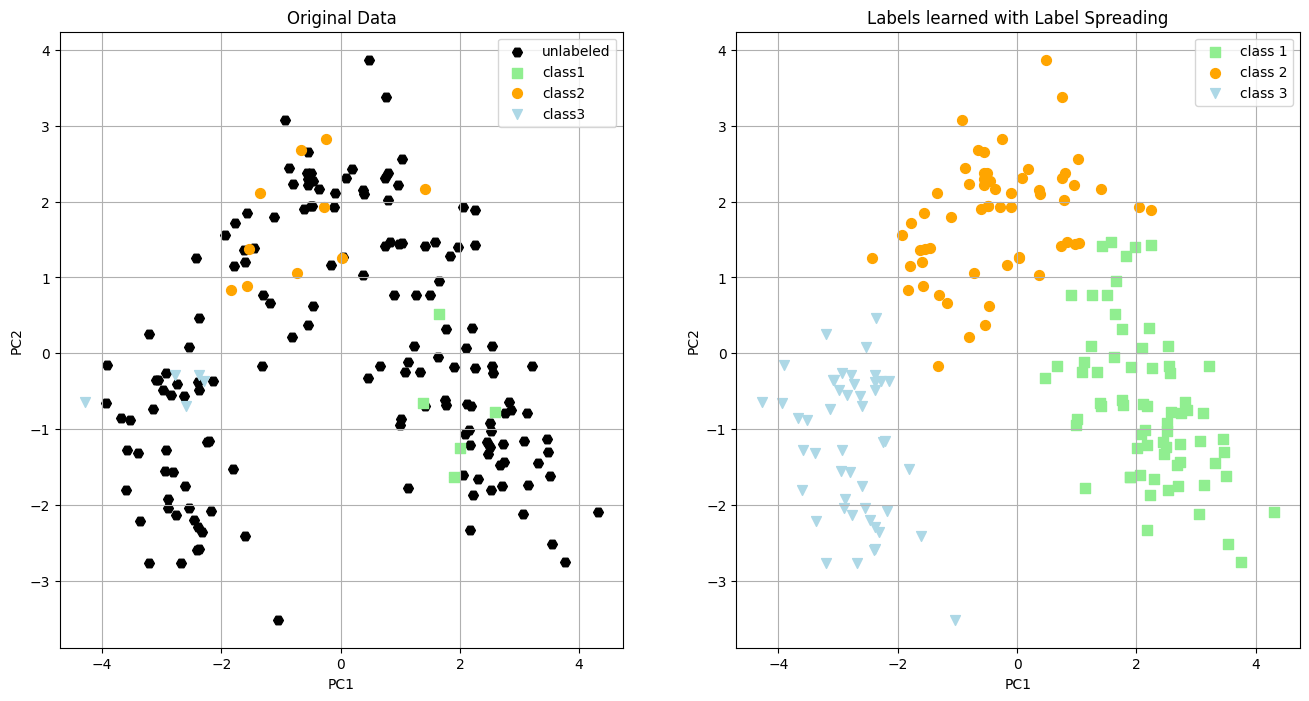

In [6]:
colors = (["lightgreen", "orange", "lightblue", "m", "b", "g", "c", "y", "w", "k"])
markers = (["s", "o", "v", "^", "D", ">", "<", "d", "p", "H"])

plt.figure(figsize=(16,8))
plt.subplot(121)
for c in range(-1,n_class):
    if(c == -1):
        cls_label = 'unlabeled'
    else:
        cls_label = 'class'+str(c+1)
    plt.scatter(X_pca[c == y_semi, 0],
                X_pca[c == y_semi, 1],
                s=50,
                c=colors[c],
                marker=markers[c],
                label= cls_label)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Original Data")
plt.legend()
plt.grid()

plt.subplot(122)
for c in range(0,n_class):
    plt.scatter(X_pca[c == y_pred, 0],
                X_pca[c == y_pred, 1],
                s=50,
                c=colors[c],
                marker=markers[c],
                label="class " + str(c+1))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Labels learned with Label Spreading")
plt.legend()
plt.grid()
plt.show()

### 課題1(a). 教師率を変化させたときのAccuracy
- 全特徴量を使用すること
- データ数が少ないため，学習データに対するAccuracyで良い
- 異なる乱数による結果の平均を用いると良い

In [15]:
seed_list = [412, 13, 666, 250, 777, 333, 999, 555, 888, 123, 456, 789, 135, 246, 579, 1357, 2468, 5791, 13579, 24680]

In [18]:
ls = LabelSpreading(kernel='knn', n_neighbors=10, alpha=0.1)

labeled_ratio_list = np.arange(0.1, 1.0, 0.1)
acc_list = []

for labeled_ratio in labeled_ratio_list:
    acc_sum = 0
    for seed in seed_list:
        np.random.seed(seed)
        y_semi = set_unlabeled_data(y, labeled_ratio)    
        ls.fit(X, y_semi)
        acc = ls.score(X, y)
        acc_sum += acc
    acc_list.append(acc_sum/len(seed_list))

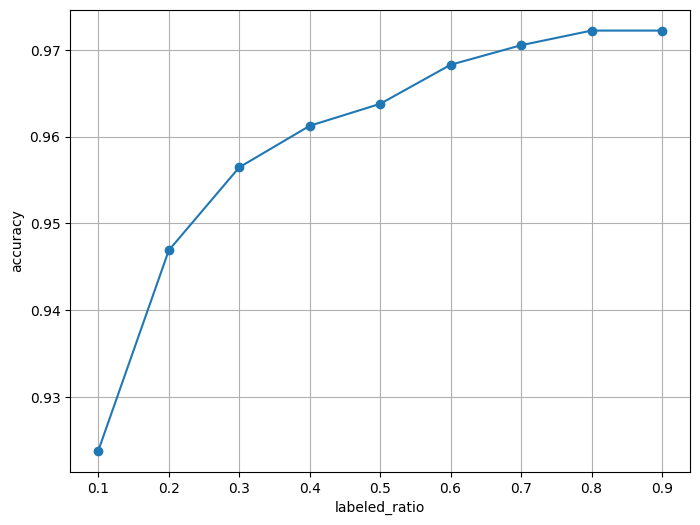

In [19]:
# Accuracyをプロット
plt.figure(figsize=(8,6))
plt.plot(labeled_ratio_list, acc_list, marker='o')
plt.xlabel('labeled_ratio')
plt.ylabel('accuracy')
plt.grid()
plt.show()

## 考察
- 教師率を上げるほどaccuracyが向上している。これは、教師率が低い場合、ラベルなしデータへのラベル付が間違える可能性が高いのに対して、教師率が向上すると、ラベル付が間違える可能性が下がるからだと思われる。
- 0.8, 0.9あたりでは教師率によるaccuracyの向上がほぼ見られなくなっており、教師率0.8で全てのラベルなしデータに適切なラベル付ができている可能性が高い。

### 課題1(b). Clamping Factor を変化させたときのAccuracy

In [27]:
labeled_ratio = 0.1

alpha_list = np.arange(0.1, 1.0, 0.1)
acc_list = []
for alpha in alpha_list:
    acc_sum = 0
    for seed in seed_list:
        np.random.seed(seed)
        y_semi = set_unlabeled_data(y, labeled_ratio)
        ls = LabelSpreading(kernel='knn', n_neighbors=10, alpha=alpha)
        ls.fit(X, y_semi)
        acc = ls.score(X, y)
        acc_sum += acc
    acc_list.append(acc_sum/len(seed_list))

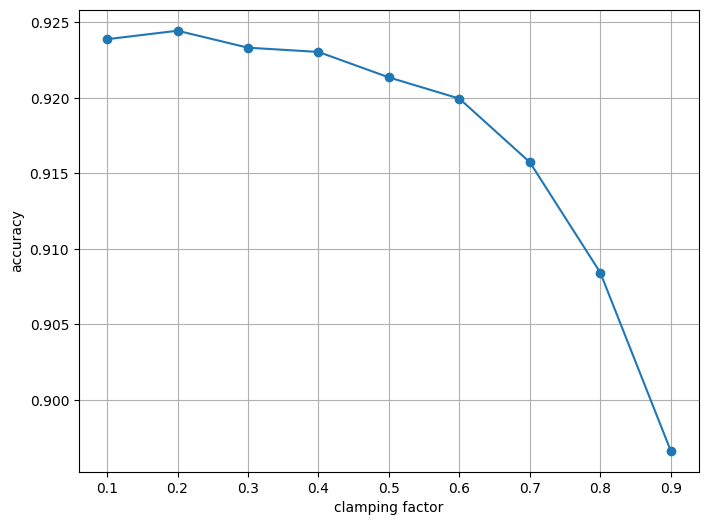

In [28]:
# Accuracyをプロット
plt.figure(figsize=(8,6))
plt.plot(alpha_list, acc_list, marker='o')
plt.xlabel('clamping factor')
plt.ylabel('accuracy')
plt.grid()
plt.show()

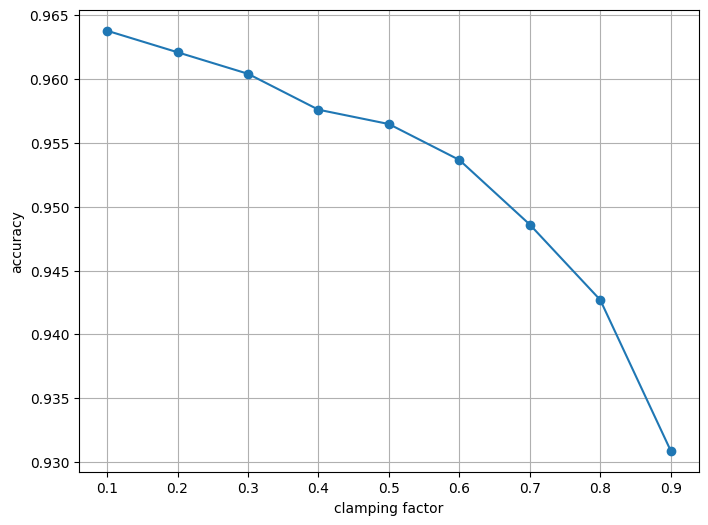

In [29]:
labeled_ratio = 0.5

alpha_list = np.arange(0.1, 1.0, 0.1)
acc_list = []
for alpha in alpha_list:
    acc_sum = 0
    for seed in seed_list:
        np.random.seed(seed)
        y_semi = set_unlabeled_data(y, labeled_ratio)
        ls = LabelSpreading(kernel='knn', n_neighbors=10, alpha=alpha)
        ls.fit(X, y_semi)
        acc = ls.score(X, y)
        acc_sum += acc
    acc_list.append(acc_sum/len(seed_list))

# Accuracyをプロット
plt.figure(figsize=(8,6))
plt.plot(alpha_list, acc_list, marker='o')
plt.xlabel('clamping factor')
plt.ylabel('accuracy')
plt.grid()
plt.show()

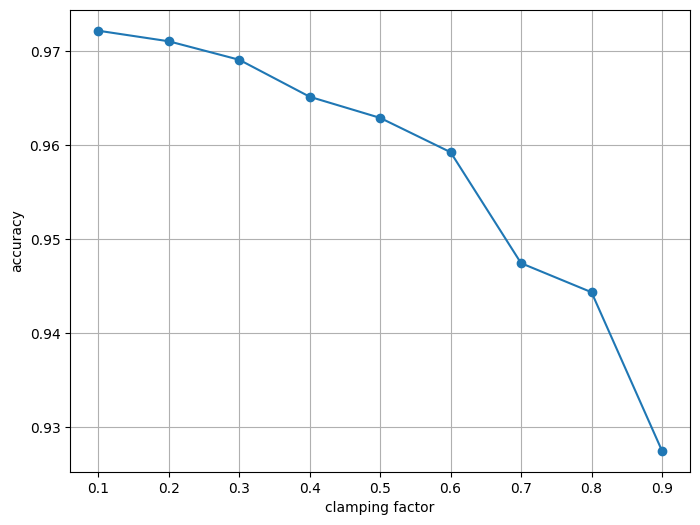

In [30]:
labeled_ratio = 0.9

alpha_list = np.arange(0.1, 1.0, 0.1)
acc_list = []
for alpha in alpha_list:
    acc_sum = 0
    for seed in seed_list:
        np.random.seed(seed)
        y_semi = set_unlabeled_data(y, labeled_ratio)
        ls = LabelSpreading(kernel='knn', n_neighbors=10, alpha=alpha)
        ls.fit(X, y_semi)
        acc = ls.score(X, y)
        acc_sum += acc
    acc_list.append(acc_sum/len(seed_list))

# Accuracyをプロット
plt.figure(figsize=(8,6))
plt.plot(alpha_list, acc_list, marker='o')
plt.xlabel('clamping factor')
plt.ylabel('accuracy')
plt.grid()
plt.show()

## 考察
- clamping factorを大きくするほどaccuracyは低下した。これは、clamping factorが大きすぎると、近傍のラベルなしデータの情報をあまり考慮しなくなるため、実質的に教師データが少なくなっているのと同じ状況になっているためだと考えられる。
- 異なる教師率においても同様の傾向が見られた。

### 課題1(c). 近傍数（近傍半径）を変化させたときのAccuracy

### rbfカーネル

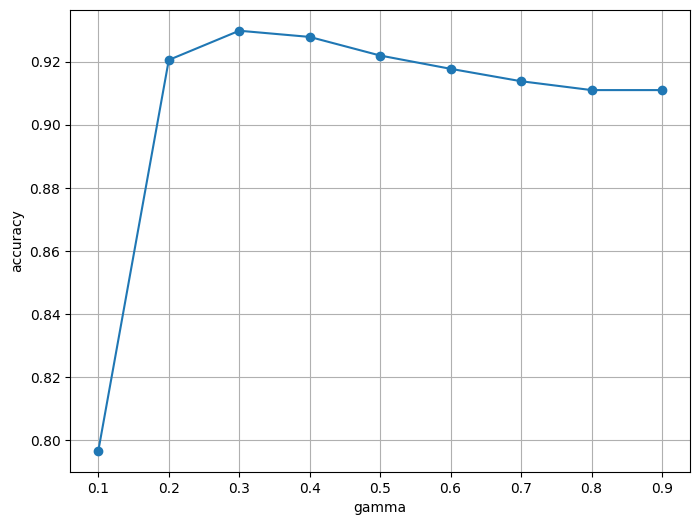

In [36]:
labeled_ratio = 0.1
alpha = 0.1
gamma_list = np.arange(0.1, 1.0, 0.1)
acc_list = []
for gamma in gamma_list:
    acc_sum = 0
    for seed in seed_list:
        np.random.seed(seed)
        y_semi = set_unlabeled_data(y, labeled_ratio)
        ls = LabelSpreading(kernel='rbf', gamma=gamma, alpha=alpha)
        ls.fit(X, y_semi)
        acc = ls.score(X, y)
        acc_sum += acc
    acc_list.append(acc_sum/len(seed_list))

# Accuracyをプロット
plt.figure(figsize=(8,6))
plt.plot(gamma_list, acc_list, marker='o')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.grid()
plt.show()

## 考察
- gammaは0.1から0.2にかけてaccuracyが大幅に改善し、0.3の時に最大となった。
- gammaが0.1の場合、広い範囲のデータの影響を受けるため、汎化性能は向上するが、全体的なaccuracyが低下している
- 一方、gammaが0.9など大きい値の場合、局所的な細かい特徴を学習するため、汎化性能が低下して、0.3程度の場合に比べてaccuracyが低下している

### knnカーネル

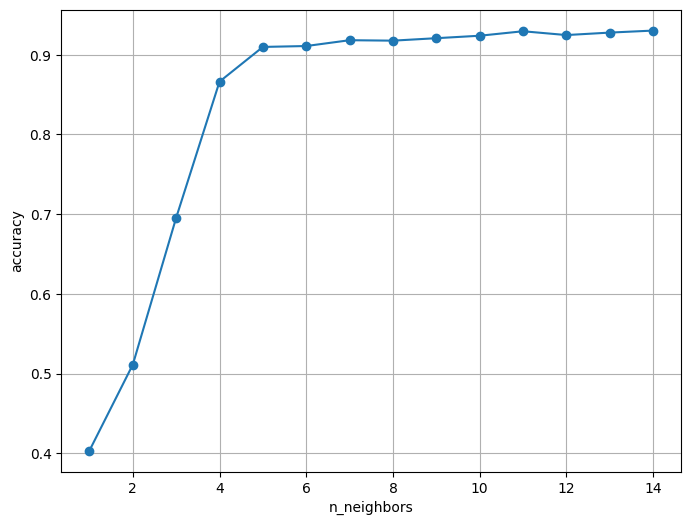

In [37]:
labeled_ratio = 0.1
alpha = 0.1
n_neighbors_list = np.arange(1, 15, 1)
acc_list = []
for n_neighbors in n_neighbors_list:
    acc_sum = 0
    for seed in seed_list:
        np.random.seed(seed)
        y_semi = set_unlabeled_data(y, labeled_ratio)
        ls = LabelSpreading(kernel='knn', n_neighbors=n_neighbors, alpha=alpha)
        ls.fit(X, y_semi)
        acc = ls.score(X, y)
        acc_sum += acc
    acc_list.append(acc_sum/len(seed_list))

# Accuracyをプロット
plt.figure(figsize=(8,6))
plt.plot(n_neighbors_list, acc_list, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.show()

## 考察
- n_neighborsは1から5にかけてaccuracyが改善し、その後は大きく変化しなかった
- n_neighborsが小さすぎる場合、近隣に教師ラベル付きのデータが存在しない可能性が高くなり、accuracyが低下していると考えられる